# World Wide Products Inc.
 - EECS 731 Project 5
 - Author: Ashwin Rathore

## Problem Statement
### Determine Demand for a particular product
1. Set up a data science project structure in a new git repository in your GitHub account
2. Download the product demand data set from
https://www.kaggle.com/felixzhao/productdemandforecasting
3. Load the data set into panda data frames
4. Formulate one or two ideas on how feature engineering would help the data set to establish additional value using exploratory data analysis
5. Build one or more forecasting models to determine the demand for a particular product using the other columns as features
6. Document your process and results
7. Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub

## Goal
Our goal is to predict the demand of a product for the upcoming month by using the data of the deman of the same product in previous months.

#### Step 1: Imort data from Demand.csv into pandas dataframe

In [151]:
import pandas as pd
data = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\Russia_history_data.csv')
data1 = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\Australia_history_data.csv')
data2 = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\UK_history_data.csv')
data3 = pd.read_csv(r'C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\731_Final_Project\Contries_Data\Usa_history_data.csv')

Let's check the top rows of the dataset.

In [152]:
data= data.append(data1)
data= data.append(data2)
data= data.append(data3)
data.head(2)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast


In [153]:
data=data.replace('russia', 'Russia')
data=data.replace('uk', 'UK')
data=data.replace('australia', 'Australia')
data=data.replace('United States', 'United_States')
data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Russia,01/01/1970,10.1,-2.1,4.7,-19.7,NaN,0.0,NaN,13.9,NaN,6.2,48.3,84.54,Partially cloudy
1,Russia,01/02/1970,19.1,-3.9,10.4,-14.6,NaN,0.0,NaN,18.3,NaN,3.1,87.5,89.14,Overcast
2,Russia,01/03/1970,28.1,20.9,25.5,7.9,NaN,0.0,NaN,18.3,NaN,3.7,92.5,91.09,Overcast
3,Russia,01/04/1970,26.9,20.9,22.7,6.9,NaN,0.0,NaN,16.1,NaN,3.7,97.5,89.49,Overcast
4,Russia,01/05/1970,32.1,28.1,29.5,18.2,NaN,0.0,NaN,16.1,NaN,2.7,100.0,92.43,Overcast


#### Step 2: Data Analysis and Feature Engineering

Check the number of samples in the dataset

In [154]:
data.shape

(72606, 15)

We have over 1 million samples in this dataset. 
Our goal is to predict the demand of a product so Warehouse and Product_Category are not going to help us in achieving the same.
Let's drop both the columns and look at the dataset.

In [155]:
data.isnull().sum()


Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill             33049
Heat Index             62846
Precipitation              0
Snow Depth             64523
Wind Speed                 0
Wind Gust              67827
Visibility              1141
Cloud Cover                3
Relative Humidity          0
Conditions                 0
dtype: int64

Now we check the missing data in the dataset

In [156]:
data = data.drop(["Wind Chill", "Heat Index", "Snow Depth", "Wind Gust"],axis='columns')

We have 11239 missing values in the Date feature.
Date is an important feature in determing the demand becuase it is a Time feature and we are going to predict the demand for a time in future.
So, we will drop the all samples with missing values found above.

In [157]:
data.isnull().sum()

Name                      0
Date time                 0
Maximum Temperature       0
Minimum Temperature       0
Temperature               0
Precipitation             0
Wind Speed                0
Visibility             1141
Cloud Cover               3
Relative Humidity         0
Conditions                0
dtype: int64

In [158]:
data.dropna(subset = ["Visibility"], inplace=True)
data.dropna(subset = ["Cloud Cover"], inplace=True)
data.isnull().sum()

Name                   0
Date time              0
Maximum Temperature    0
Minimum Temperature    0
Temperature            0
Precipitation          0
Wind Speed             0
Visibility             0
Cloud Cover            0
Relative Humidity      0
Conditions             0
dtype: int64

Let's see what else we can do with the data

In [159]:
data.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Russia,01/01/1970,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy
1,Russia,01/02/1970,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast
2,Russia,01/03/1970,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast
3,Russia,01/04/1970,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast
4,Russia,01/05/1970,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast


In the Date feature, the format of date is dd-mm-yy which is not acceptable in the Forecasting model so we need to convert it into yyyy-mm-dd.

First we will split the date on the basis of "-" in to three columns.

In [160]:
data.rename(columns={'Date time': 'Date', 'Maximum Temperature': 'Maximum_Temperature','Minimum Temperature': 'Minimum_Temperature','Wind Speed': 'Wind_Speed','Cloud Cover': 'Cloud_Cover','Relative Humidity': 'Relative_Humidity'}, inplace=True)
data

,Name,Date,Maximum_Temperature,Minimum_Temperature,Temperature,Precipitation,Wind_Speed,Visibility,Cloud_Cover,Relative_Humidity,Conditions
0,Russia,01/01/1970,10.1,-2.1,4.7,0.00,13.9,6.2,48.3,84.54,Partially cloudy
1,Russia,01/02/1970,19.1,-3.9,10.4,0.00,18.3,3.1,87.5,89.14,Overcast
2,Russia,01/03/1970,28.1,20.9,25.5,0.00,18.3,3.7,92.5,91.09,Overcast
3,Russia,01/04/1970,26.9,20.9,22.7,0.00,16.1,3.7,97.5,89.49,Overcast
4,Russia,01/05/1970,32.1,28.1,29.5,0.00,16.1,2.7,100.0,92.43,Overcast
...,...,...,...,...,...,...,...,...,...,...,...
18540,United_States,10/28/2020,69.7,61.6,65.3,0.00,11.9,8.6,42.1,87.16,Partially cloudy
18541,United_States,10/29/2020,63.5,52.9,58.3,2.25,16.4,6.4,57.1,91.80,"Rain, Partially cloudy"
18542,United_States,10/30/2020,53.8,48.6,50.9,0.31,20.5,9.7,89.3,76.92,"Rain, Overcast"
18543,United_States,10/31/2020,49.6,40.5,46.6,0.00,14.3,9.9,86.7,69.44,Overcast


In [161]:
Date=data.Date.str.split("/",expand=True) 
Date.head(3)

,0,1,2
0,01,01,1970
1,01,02,1970
2,01,03,1970


Now we can see that Date is a new dataframe with columns as dd, mm, and yy.
Now we convert the Year column in to strin and add "20" as prefix so we can convert yy to yyyy. Ex- 16 will be 2016

Now we will combine year and month columns in the format yyyy-mm by concatenating them.

In [162]:
Date['Combined'] = Date[2].str.cat(Date[0],sep="-")
Date.head(3)

,0,1,2,Combined
0,01,01,1970,1970-01
1,01,02,1970,1970-01
2,01,03,1970,1970-01


Now we will concatenate the "-01" at the end of every combined value which gives us yyyy-mm-dd format of date. The reason behind adding the 01 as the day is that we will be predicting the demand of product for the upcoming month based on the previous months and have different dates of the same month doesn't make any difference.

In [163]:
Date['Combined'] = Date['Combined'].astype(str)+"-01"
Date

,0,1,2,Combined
0,01,01,1970,1970-01-01
1,01,02,1970,1970-01-01
2,01,03,1970,1970-01-01
3,01,04,1970,1970-01-01
4,01,05,1970,1970-01-01
...,...,...,...,...
18540,10,28,2020,2020-10-01
18541,10,29,2020,2020-10-01
18542,10,30,2020,2020-10-01
18543,10,31,2020,2020-10-01


Now we replace the Date feature's values in our original dataframe with the new date format

In [164]:
data['Date'] =  Date['Combined']
data.dtypes

Name                    object
Date                    object
Maximum_Temperature    float64
Minimum_Temperature    float64
Temperature            float64
Precipitation          float64
Wind_Speed             float64
Visibility             float64
Cloud_Cover            float64
Relative_Humidity      float64
Conditions              object
dtype: object

The Date feature has a datatype of object as we can see above and we need datetime64 to feed the data in to the models so we change it.

In [165]:
data['Date']=data['Date'].astype('datetime64[ns]')
data.dtypes

Name                           object
Date                   datetime64[ns]
Maximum_Temperature           float64
Minimum_Temperature           float64
Temperature                   float64
Precipitation                 float64
Wind_Speed                    float64
Visibility                    float64
Cloud_Cover                   float64
Relative_Humidity             float64
Conditions                     object
dtype: object

Let's look at the data again and see what else we can do.

In [166]:
data.head(5)

,Name,Date,Maximum_Temperature,Minimum_Temperature,Temperature,Precipitation,Wind_Speed,Visibility,Cloud_Cover,Relative_Humidity,Conditions
0,Russia,1970-01-01,10.1,-2.1,4.7,0.0,13.9,6.2,48.3,84.54,Partially cloudy
1,Russia,1970-01-01,19.1,-3.9,10.4,0.0,18.3,3.1,87.5,89.14,Overcast
2,Russia,1970-01-01,28.1,20.9,25.5,0.0,18.3,3.7,92.5,91.09,Overcast
3,Russia,1970-01-01,26.9,20.9,22.7,0.0,16.1,3.7,97.5,89.49,Overcast
4,Russia,1970-01-01,32.1,28.1,29.5,0.0,16.1,2.7,100.0,92.43,Overcast


In [167]:
df = data.groupby(['Name','Date'])['Temperature'].mean().reset_index()
df

,Name,Date,Temperature
0,Australia,1973-01-01,72.190323
1,Australia,1973-02-01,68.244444
2,Australia,1973-03-01,62.383871
3,Australia,1973-04-01,56.826667
4,Australia,1973-05-01,48.796774
...,...,...,...
2349,United_States,2020-07-01,83.187097
2350,United_States,2020-08-01,78.925806
2351,United_States,2020-09-01,70.356667
2352,United_States,2020-10-01,61.493548


In [168]:
df=df.pivot(index='Date', columns='Name', values='Temperature')
df.head(2)

Name,Australia,Russia,UK,United_States
Date,,,,
1970-01-01,NaN,13.977419,NaN,30.312903
1970-02-01,NaN,17.900000,NaN,37.192857


In [169]:
df2 = df['United_States'].copy()
df2.head(2)

Date
1970-01-01    30.312903
1970-02-01    37.192857
Name: United_States, dtype: float64

In [170]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    30.312903
1970-02-01    37.192857
Name: United_States, dtype: float64

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [172]:
df4=df2.resample('AS').mean()

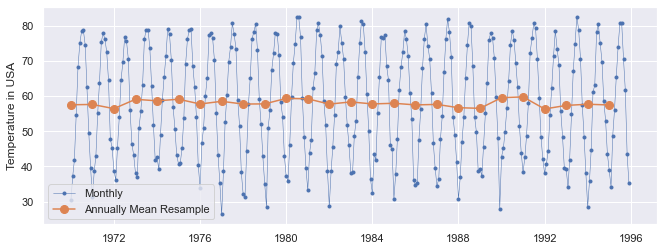

In [173]:
start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_USA1.png')

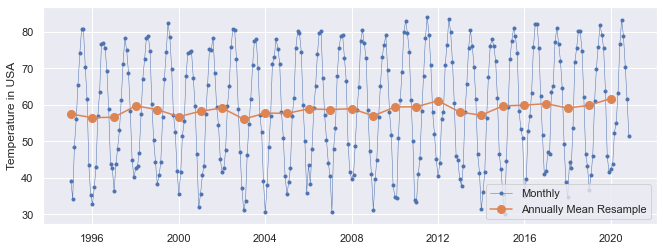

In [174]:
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_USA2.png')

In [179]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

563 48


In [180]:
history = [x for x in train]
history
predictions=[]

In [181]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

IndexError: index out of bounds

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Order_Demand']=predictions
plt.plot(pd.DataFrame(test))
plt.plot(prediction)
plt.show()

In [86]:
df2 = df['Russia'].copy()

In [87]:
df2=df2.dropna()

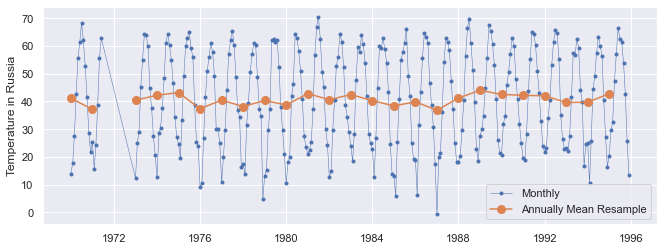

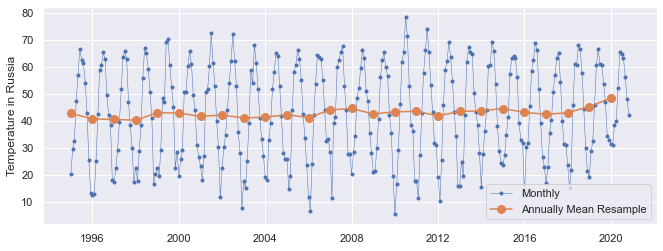

In [89]:
df4=df2.resample('AS').mean()
start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_Russia2.png')

In [530]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

543 50


In [531]:
history = [x for x in train]
history
predictions=[]

In [532]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

Test RMSE: 6.488


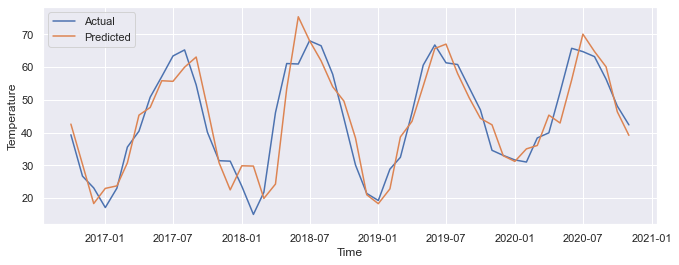

In [533]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

In [90]:
df2 = df['UK'].copy()
df2=df2.dropna()
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)
history = [x for x in train]
history
predictions=[]

525 50


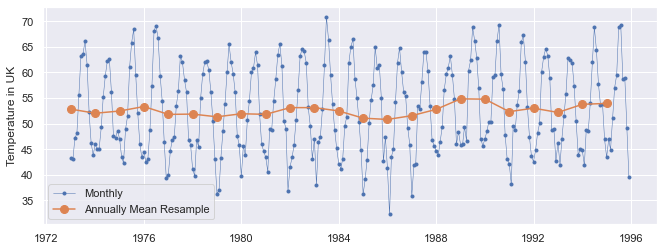

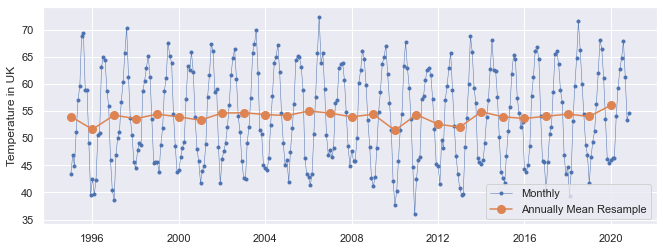

In [91]:
df4=df2.resample('AS').mean()
start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_UK2.png')

In [535]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

Test RMSE: 3.690


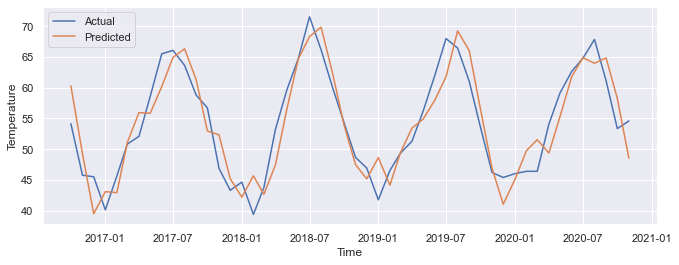

In [536]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

In [92]:
df2 = df['Australia'].copy()
df2=df2.dropna()
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)
history = [x for x in train]
history
predictions=[]

525 50


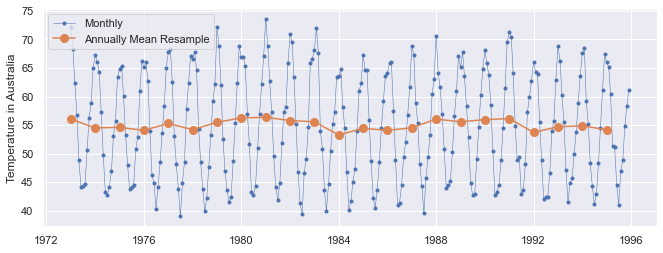

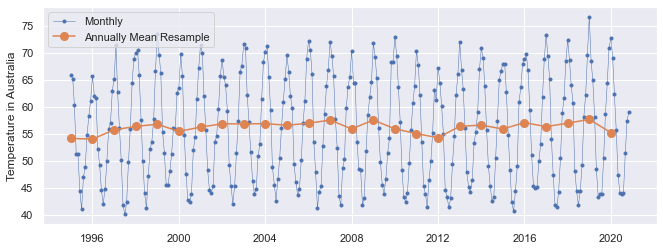

In [93]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Temperature in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Temp_Australia2.png')

In [538]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

Test RMSE: 2.640


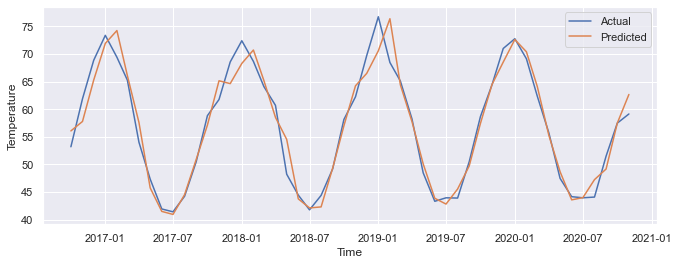

In [539]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Temperature']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Temperature'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()

In [94]:
df = data.groupby(['Name','Date'])['Precipitation'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Precipitation')
df.head(2)

Name,Australia,Russia,UK,United_States
Date,,,,
1970-01-01,NaN,0.0,NaN,0.040968
1970-02-01,NaN,0.0,NaN,0.097500


In [95]:
df2 = df['United_States'].copy()
df2.head(2)

Date
1970-01-01    0.040968
1970-02-01    0.097500
Name: United_States, dtype: float64

In [96]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    0.040968
1970-02-01    0.097500
Name: United_States, dtype: float64

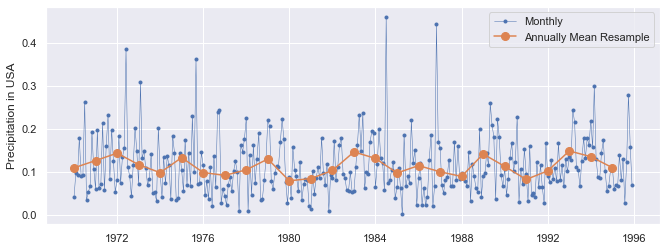

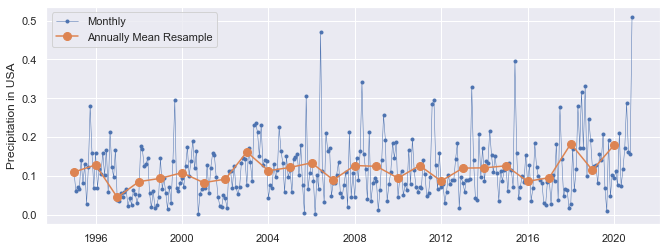

In [97]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_USA2.png')


In [553]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

561 50


In [554]:
history = [x for x in train]
history
predictions=[]

In [555]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

Test RMSE: 0.095


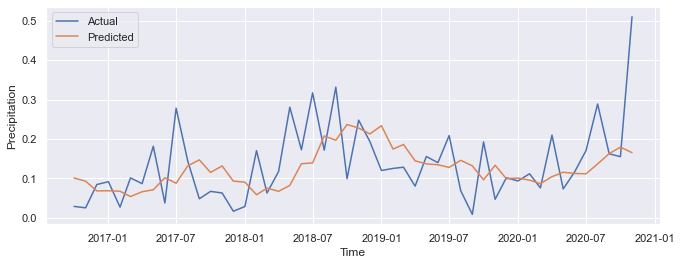

In [556]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.legend()

In [98]:
df2 = df['Russia'].copy()
df2.head(2)

Date
1970-01-01    0.0
1970-02-01    0.0
Name: Russia, dtype: float64

In [99]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    0.0
1970-02-01    0.0
Name: Russia, dtype: float64

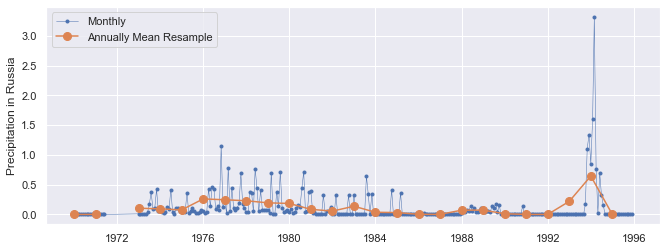

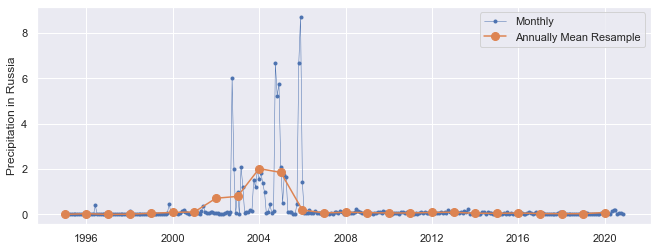

In [100]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_Russia2.png')

In [560]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

543 50


In [564]:
history = [x for x in train]
history
predictions=[]

In [565]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

Test RMSE: 0.044


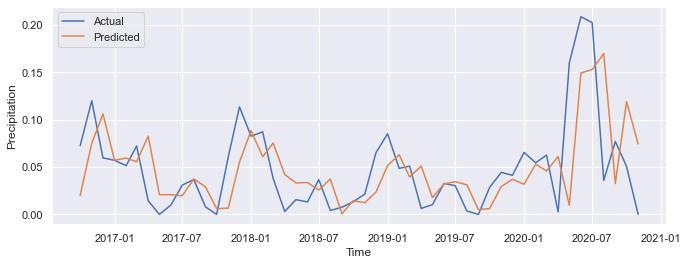

In [566]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.legend()

In [101]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1973-01-01    0.001613
1973-02-01    0.003214
Name: UK, dtype: float64

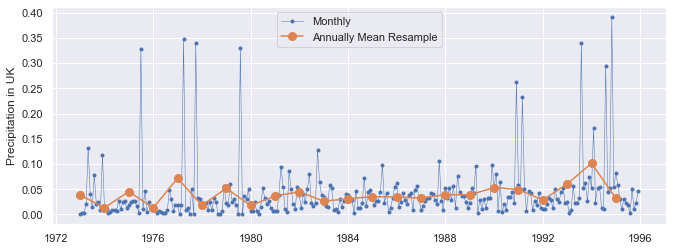

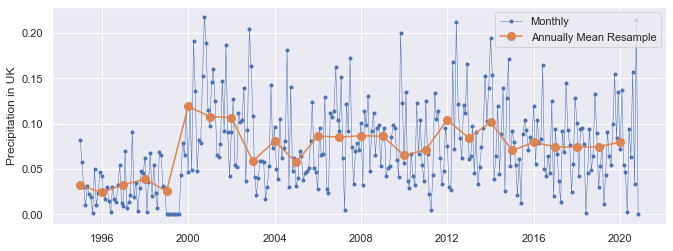

In [102]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_UK2.png')

525 50
Test RMSE: 0.050


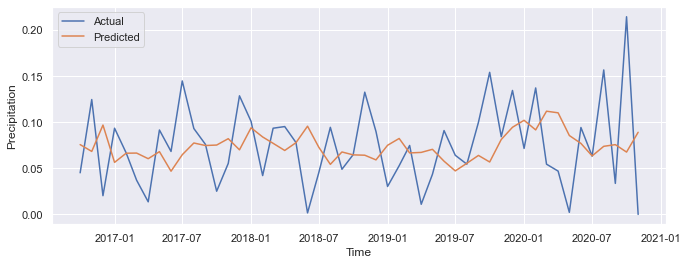

In [71]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.legend()

In [103]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1973-01-01    0.0
1973-02-01    0.0
Name: Australia, dtype: float64

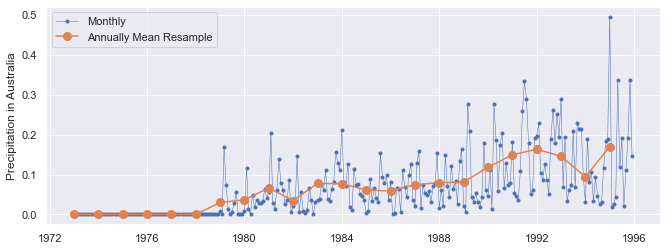

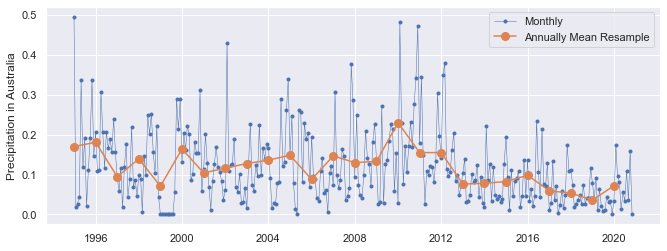

In [104]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Precipitation in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Prec_Australia2.png')

525 50
Test RMSE: 0.051


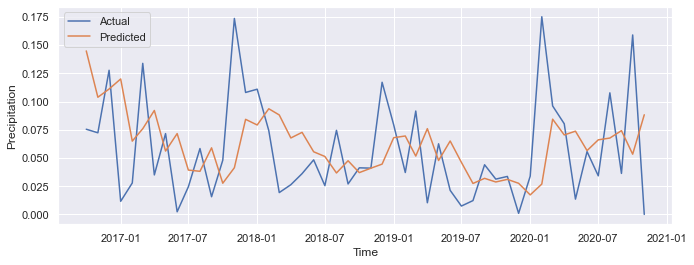

In [568]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Precipitation']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Precipitation'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Precipitation")
plt.legend()

In [105]:
df = data.groupby(['Name','Date'])['Wind_Speed'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Wind_Speed')
df.head(2)

Name,Australia,Russia,UK,United_States
Date,,,,
1970-01-01,NaN,12.180645,NaN,15.877419
1970-02-01,NaN,13.546429,NaN,17.896429


In [106]:
df2 = df['United_States'].copy()
df2.head(2)

Date
1970-01-01    15.877419
1970-02-01    17.896429
Name: United_States, dtype: float64

In [107]:
df2=df2.dropna()
df2.head(2)

Date
1970-01-01    15.877419
1970-02-01    17.896429
Name: United_States, dtype: float64

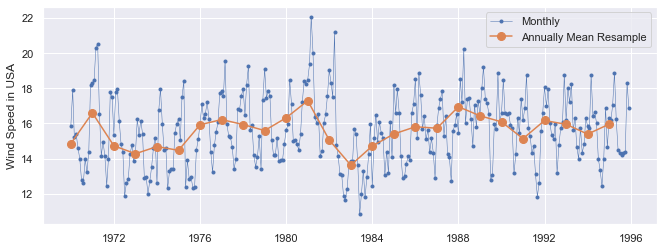

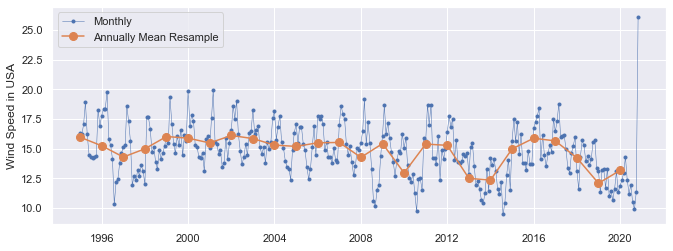

In [108]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_USA2.png')

In [572]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

561 50


In [576]:
history = [x for x in train]
history
predictions=[]

In [577]:
from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

Test RMSE: 2.701


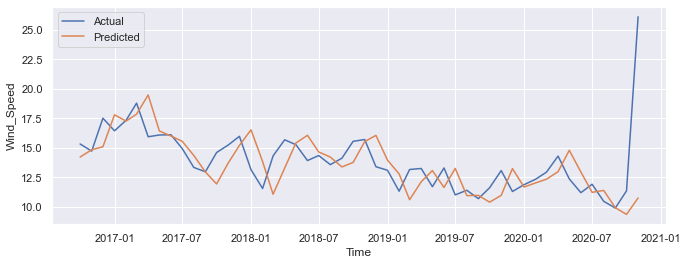

In [578]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Wind_Speed")
plt.legend()

In [109]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    12.180645
1970-02-01    13.546429
Name: Russia, dtype: float64

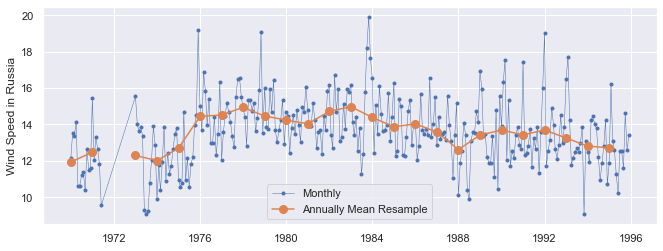

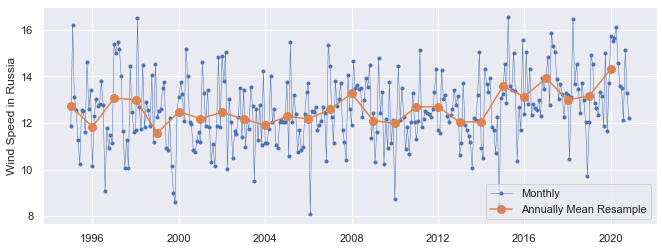

In [110]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_Russia2.png')

543 50
Test RMSE: 1.479


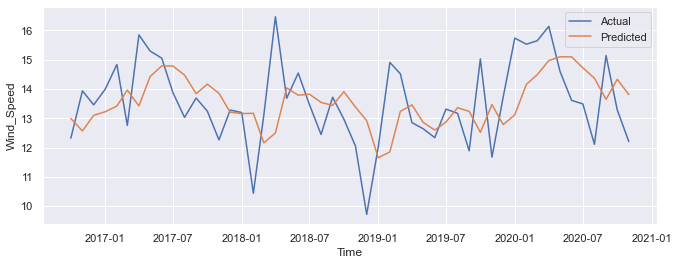

In [579]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Wind_Speed")
plt.legend()

In [114]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)



525 50


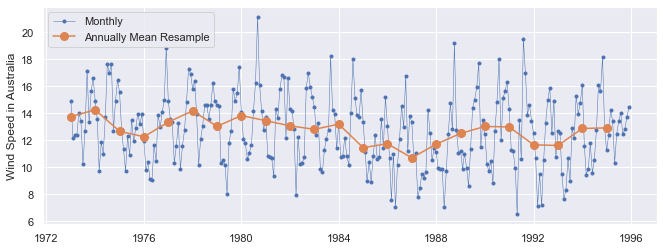

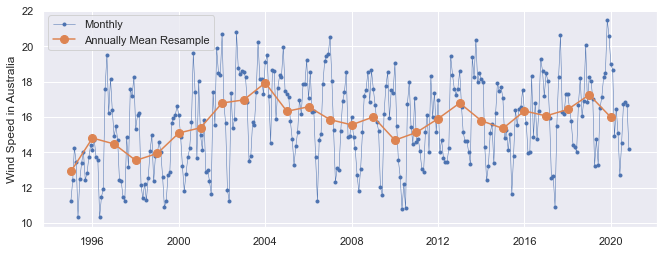

In [115]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_Australia2.png')

In [ ]:
history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Wind_Speed")
plt.legend()

In [112]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    14.677419
1973-02-01    16.467857
Name: UK, dtype: float64

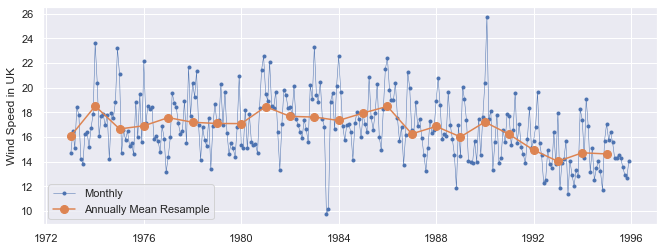

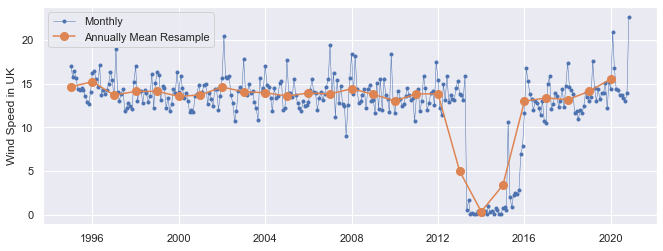

In [113]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Wind Speed in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Wind_UK2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Wind_Speed']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Wind_Speed'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Wind_Speed")
plt.legend()

In [124]:
df = data.groupby(['Name','Date'])['Relative_Humidity'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Relative_Humidity')
df.head(2)

df2 = df['United_States'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    58.032581
1970-02-01    57.245000
Name: United_States, dtype: float64

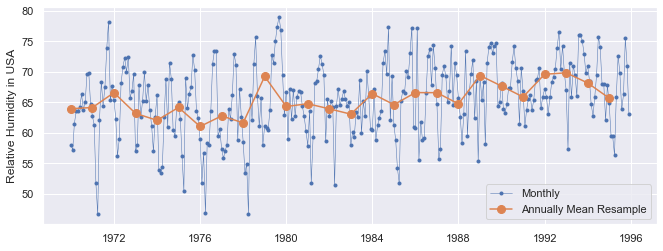

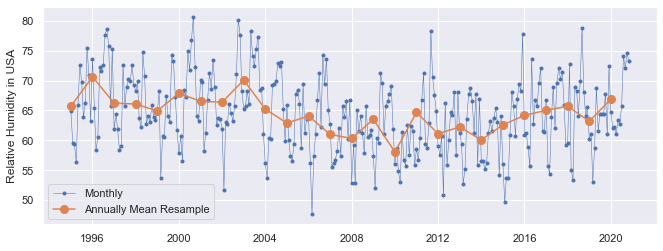

In [125]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_UK2.png')

561 50
Test RMSE: 6.204


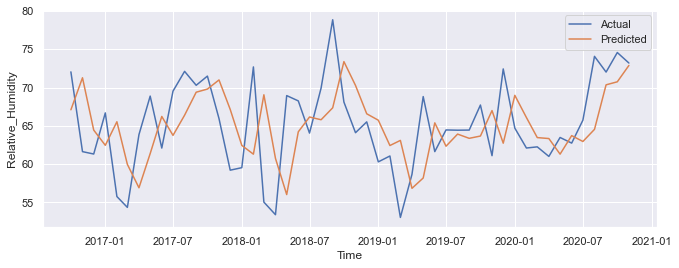

In [583]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Relative_Humidity")
plt.legend()

In [120]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    88.835806
1970-02-01    82.651429
Name: Russia, dtype: float64

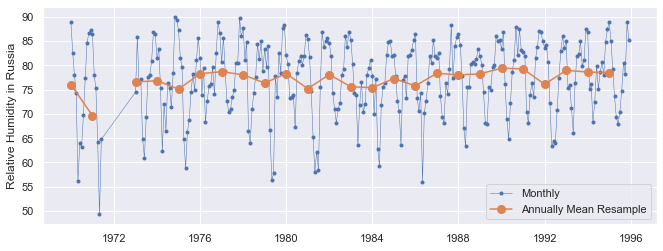

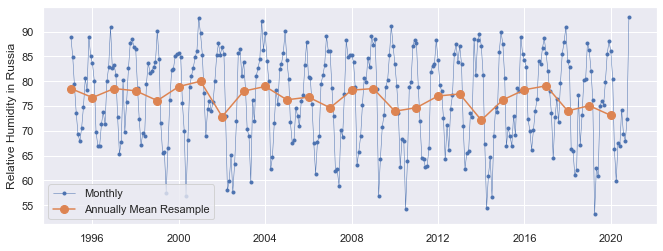

In [121]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_Russia2.png')

In [ ]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Relative_Humidity")
plt.legend()

In [122]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    56.125806
1973-02-01    71.166296
Name: Australia, dtype: float64

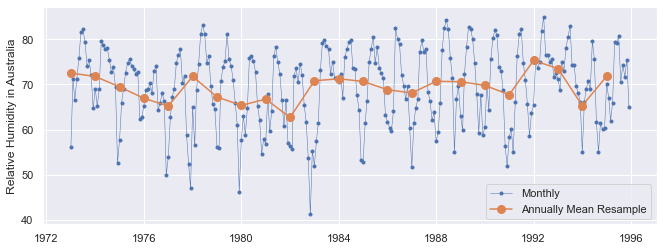

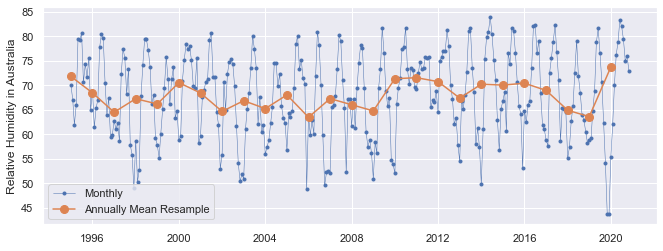

In [123]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_Australia.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_Australia.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Relative_Humidity")
plt.legend()

In [126]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    81.517742
1973-02-01    74.426071
Name: UK, dtype: float64

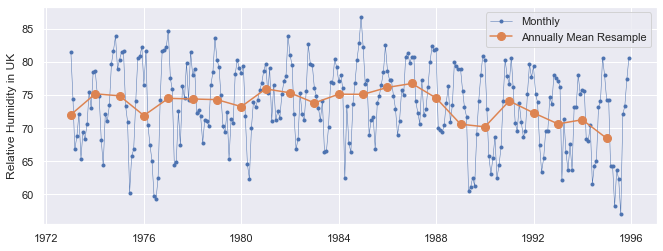

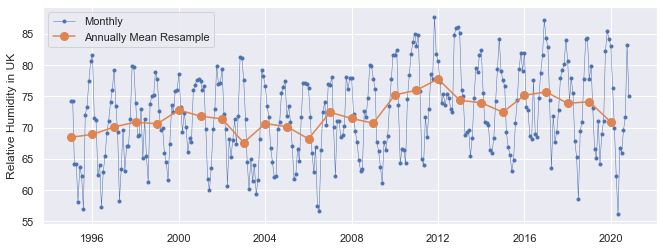

In [127]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Relative Humidity in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\RelHum_UK2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Relative_Humidity']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Relative_Humidity'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Relative_Humidity")
plt.legend()

In [128]:
df = data.groupby(['Name','Date'])['Visibility'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Visibility')
df.head(2)

df2 = df['United_States'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

Date
1970-01-01    11.041935
1970-02-01    11.228571
Name: United_States, dtype: float64

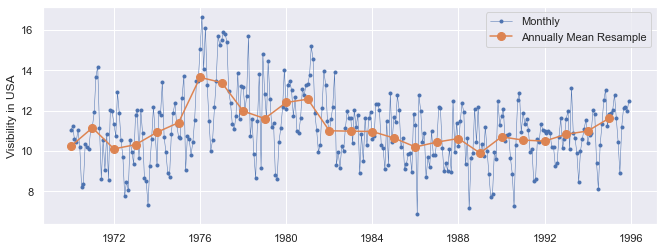

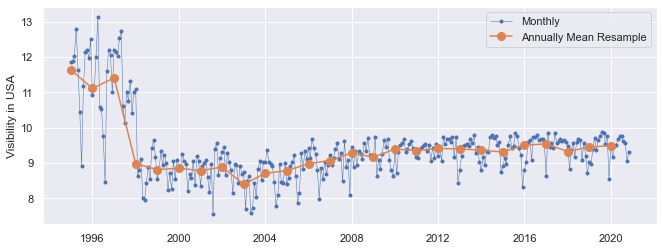

In [129]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_USA2.png')

In [130]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1970-01-01    3.845161
1970-02-01    4.414286
Name: Russia, dtype: float64

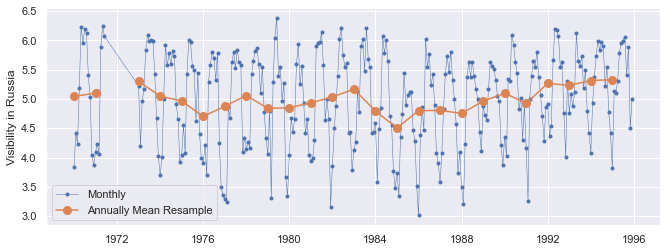

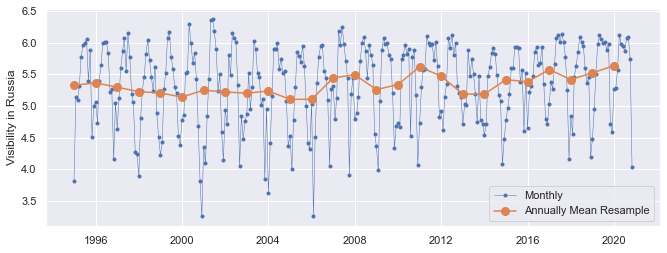

In [131]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_Russia2.png')

543 50
Test RMSE: 0.488


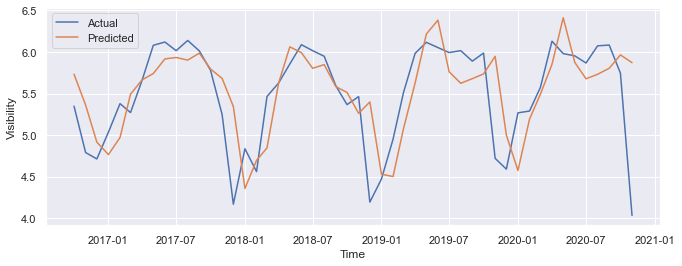

In [132]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Visibility']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Visibility'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Visibility")
plt.legend()

In [134]:
df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1973-01-01    5.787097
1973-02-01    8.414286
Name: UK, dtype: float64

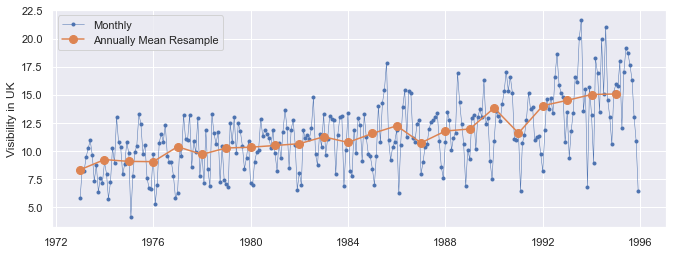

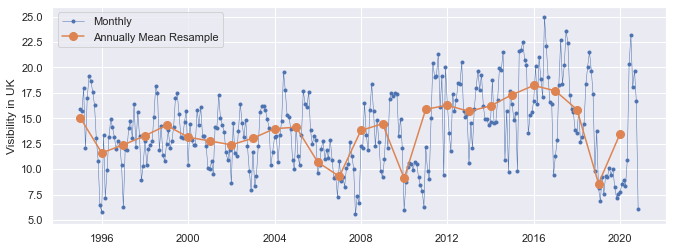

In [135]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_UK2.png')

543 50
Test RMSE: 0.488


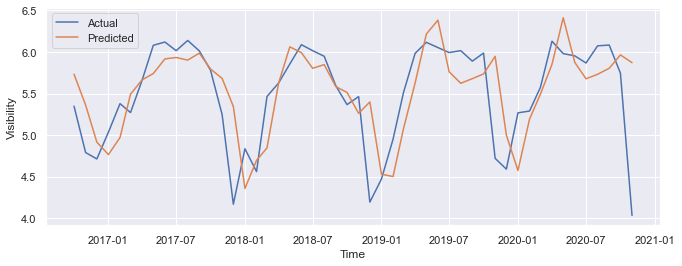

In [132]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Visibility']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Visibility'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Visibility")
plt.legend()

In [134]:
df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)


Date
1973-01-01    5.787097
1973-02-01    8.414286
Name: UK, dtype: float64

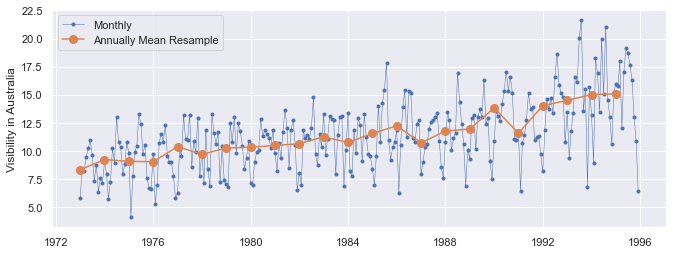

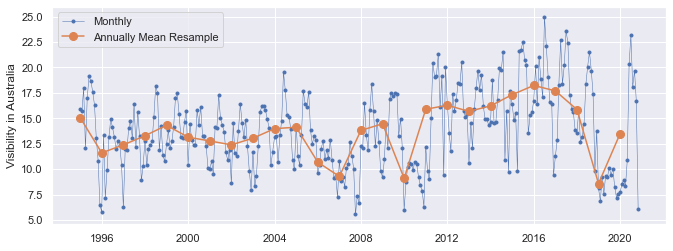

In [136]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Visibility in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\Visibiilty_Australia2.png')

543 50
Test RMSE: 0.488


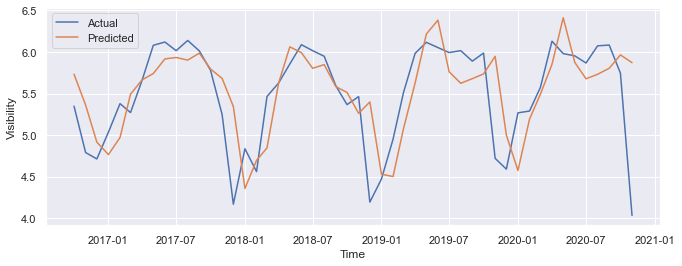

In [132]:

train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Visibility']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Visibility'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Visibility")
plt.legend()

In [137]:
df = data.groupby(['Name','Date'])['Cloud_Cover'].mean().reset_index()
df=df.pivot(index='Date', columns='Name', values='Cloud_Cover')
df.head(2)


Name,Australia,Russia,UK,United_States
Date,,,,
1970-01-01,NaN,73.706452,NaN,56.564516
1970-02-01,NaN,69.603571,NaN,58.332143


In [140]:
df2 = df['United_States'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

Date
1970-01-01    56.564516
1970-02-01    58.332143
Name: United_States, dtype: float64

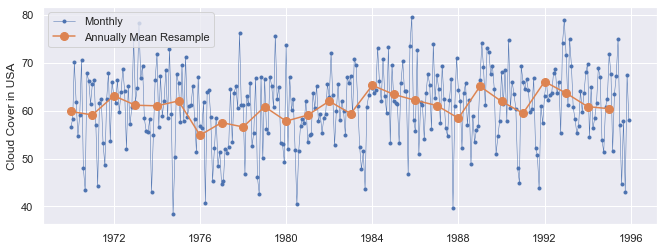

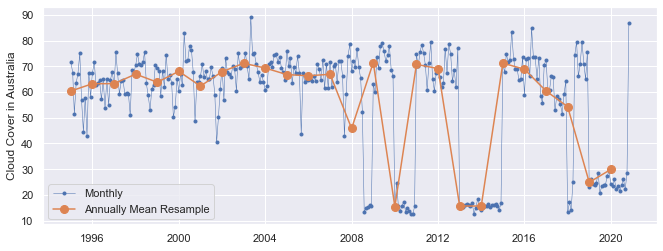

In [141]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in USA')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_USA1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_USA2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Cloud_Cover")
plt.legend()

In [144]:
df2 = df['Russia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)

Date
1970-01-01    73.706452
1970-02-01    69.603571
Name: Russia, dtype: float64

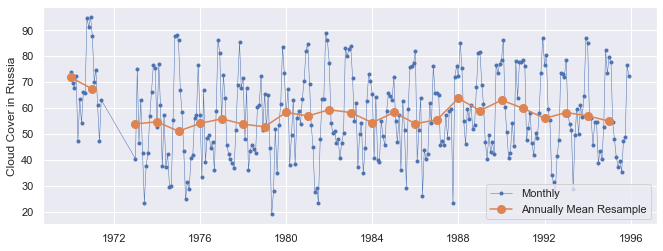

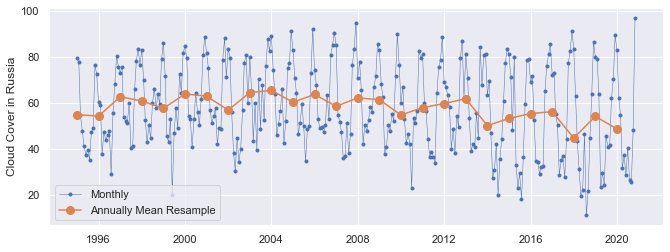

In [145]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_Russia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Russia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_Russia2.png')

543 50
Test RMSE: 16.796


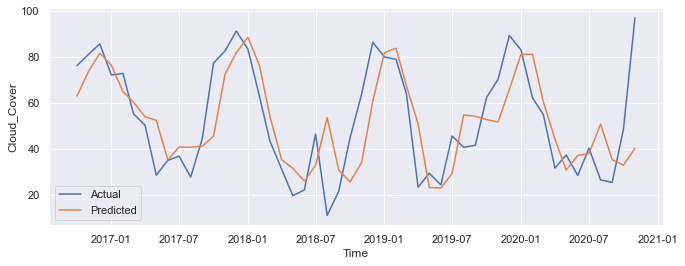

In [146]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Cloud_Cover")
plt.legend()

In [147]:

df2 = df['UK'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    82.322581
1973-02-01    66.846429
Name: UK, dtype: float64

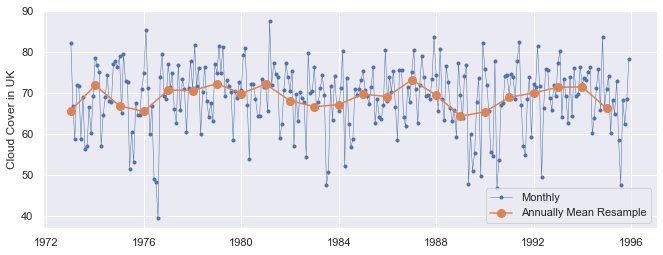

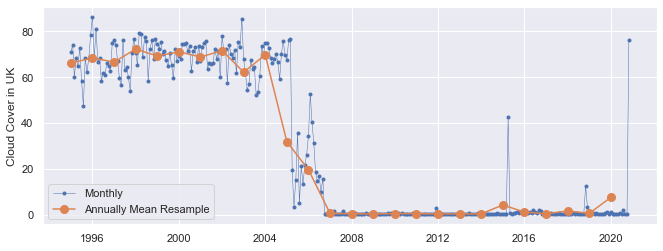

In [148]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_UK1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in UK')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_UK2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Cloud_Cover")
plt.legend()

In [149]:

df2 = df['Australia'].copy()
df2.head(2)

df2=df2.dropna()
df2.head(2)



Date
1973-01-01    54.454839
1973-02-01    70.700000
Name: Australia, dtype: float64

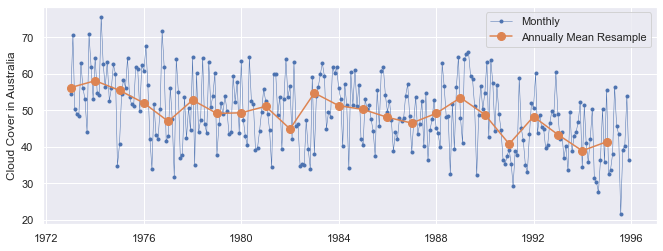

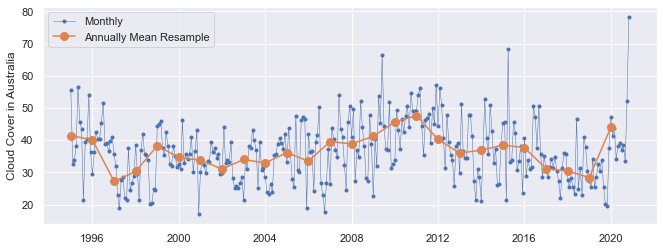

In [150]:
df4=df2.resample('AS').mean()

start, end = '1970', '1995'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_Australia1.png')
start, end = '1995', '2020'
fig, ax = plt.subplots()
ax.plot(df2.loc[start:end],
marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(df4.loc[start:end],
marker='o', markersize=8, linestyle='-', label='Annually Mean Resample')
ax.set_ylabel('Cloud Cover in Australia')
ax.legend()
fig.savefig('C:\Stuff\KU Study\EECS 731 Intro to Data Science\Final Semester Project\Figures\CloudCover_Australia2.png')

In [ ]:
train, test = df2[0:-48], df2[-48:]
print(train.size, test.size)

history = [x for x in train]
history
predictions=[]

from statsmodels.tsa.arima_model import ARIMA
for t in range(len(test)):
	# fit model
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit()
	# one step forecast
	yhat = model_fit.forecast()[0]
	# store forecast and ob
	predictions.append(yhat[0])
	history.append(test[t])

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
prediction=pd.DataFrame(test)
prediction['Cloud_Cover']=predictions
plt.plot(pd.DataFrame(test), label="Actual")
plt.plot(prediction['Cloud_Cover'], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Cloud_Cover")
plt.legend()